<a href="https://colab.research.google.com/github/Jaro1977/Analiza-obrazu-kurs/blob/main/phone_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

print(cv2.__version__)

4.7.0


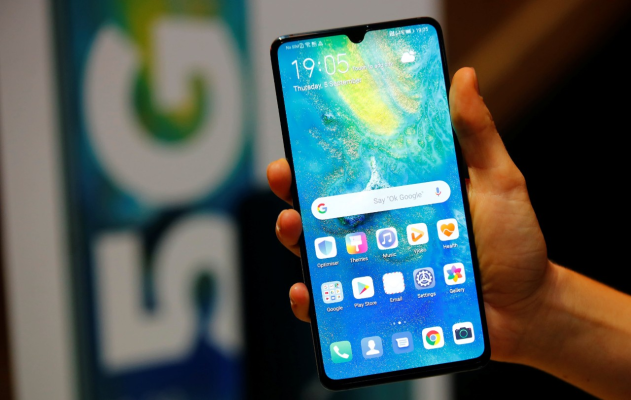

In [4]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height = 400)
cv2_imshow(image)

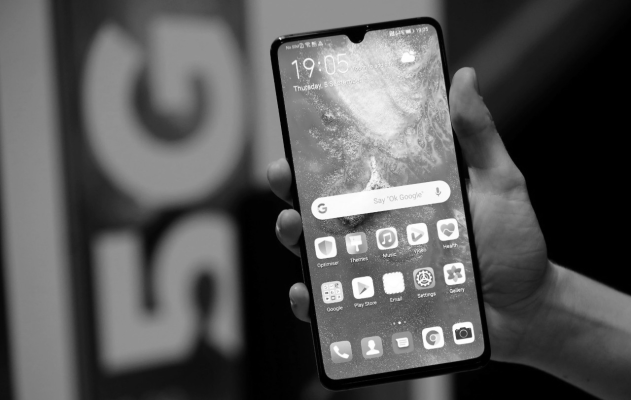

In [7]:
gray_image = cv2.cvtColor(src = image, code = cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

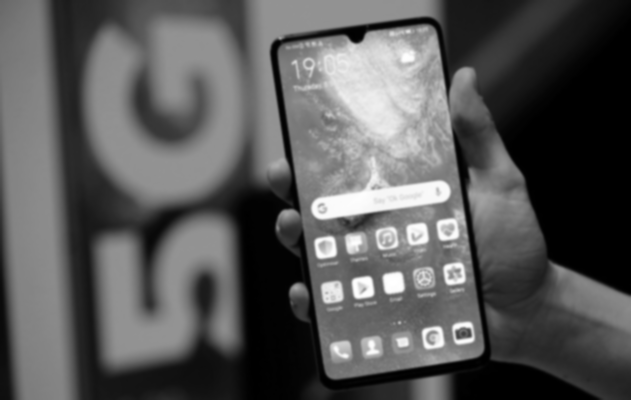

In [9]:
gray_image = cv2.GaussianBlur(src = gray_image, ksize=(5,5), sigmaX = 0)
cv2_imshow(gray_image)

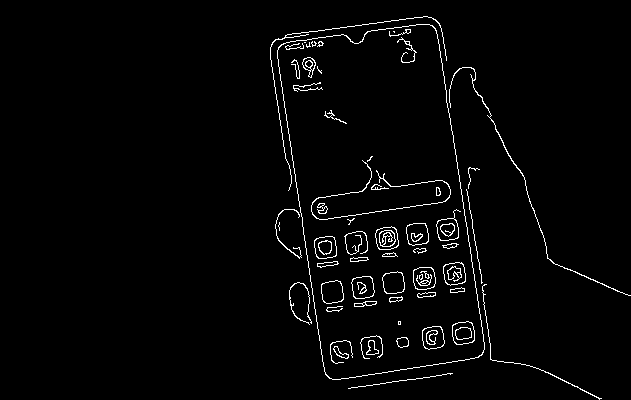

In [18]:
edges = cv2.Canny(image = gray_image, threshold1 = 70, threshold2=200)
cv2_imshow(edges)

In [24]:
contours = cv2.findContours(image = edges.copy(), mode = cv2.RETR_TREE,
                            method = cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

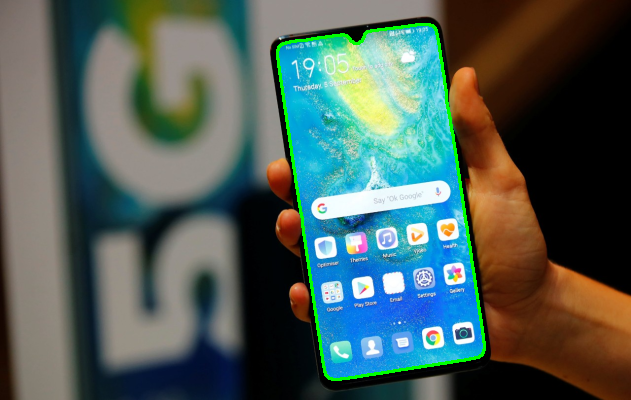

In [30]:
cnt1 = cv2.drawContours(image = image.copy(), contours = [contours[0]], contourIdx = -1,
                        color = (0,255,0), thickness = 2)
cv2_imshow(cnt1)

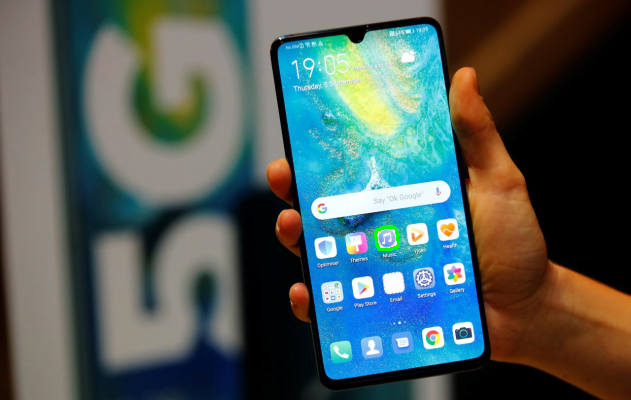

In [33]:
cnt2 = cv2.drawContours(image = image.copy(), contours = [contours[2]], contourIdx = -1,
                        color = (0,255,0), thickness = 2)
cv2_imshow(cnt2)

Detekcja prostokatna

In [34]:
screen_contour = None
for contour in contours:
  perimeter = cv2.arcLength(curve = contour, closed = True)
  approx = cv2.approxPolyDP(curve = contour, epsilon = 0.015 * perimeter, closed = True)

  if len(approx) == 4:
    screen_contour = approx
    break

In [35]:
screen_contour

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

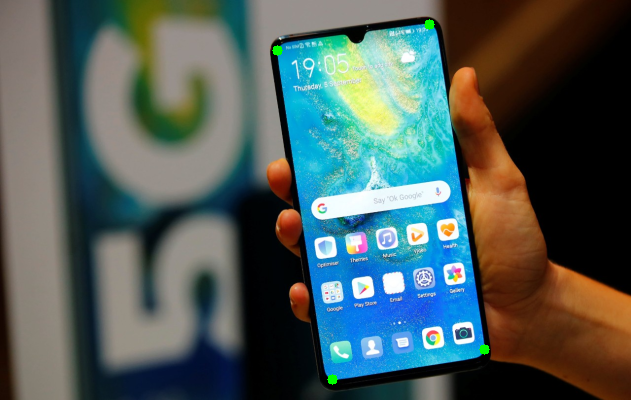

In [41]:
verticles = cv2.drawContours(image = image.copy(), contours = screen_contour,contourIdx = -1, color = (0,255,0), thickness = 10)
cv2_imshow(verticles)

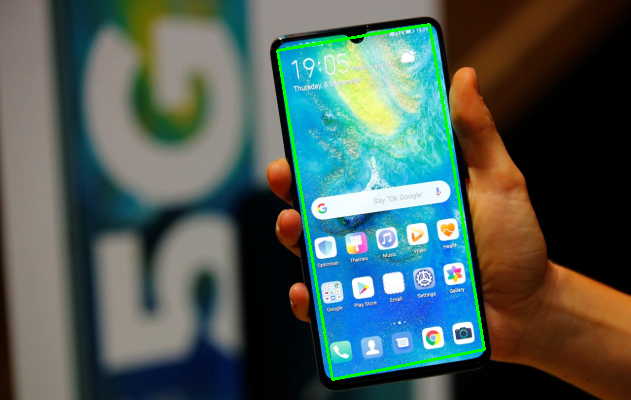

In [45]:
screen_contour = cv2.drawContours(image.copy(), contours = [screen_contour], contourIdx = -1, color = (0,255,0), thickness = 2)
cv2_imshow(screen_contour)